In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/concrete_data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

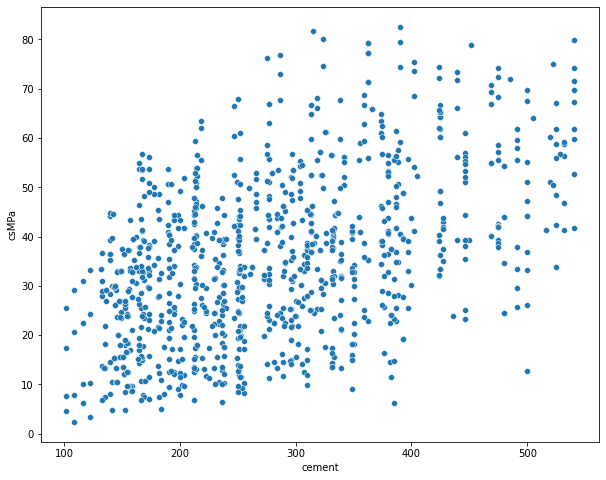

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='cement', y='csMPa', data=df);

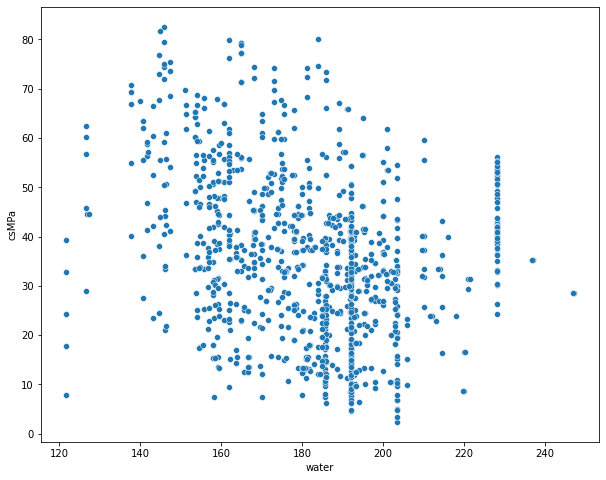

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='water', y='csMPa', data=df);

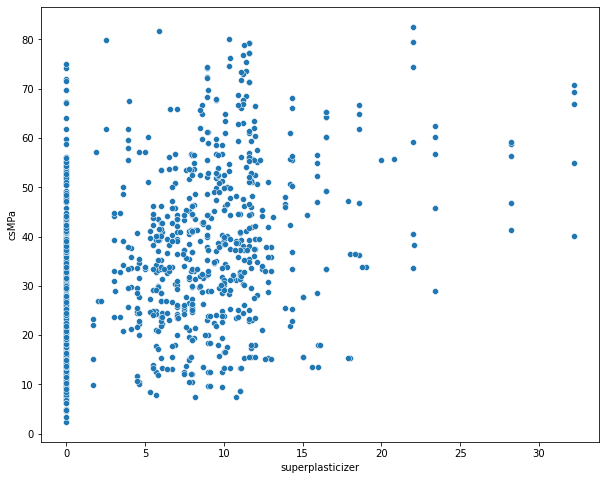

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='superplasticizer', y='csMPa', data=df);

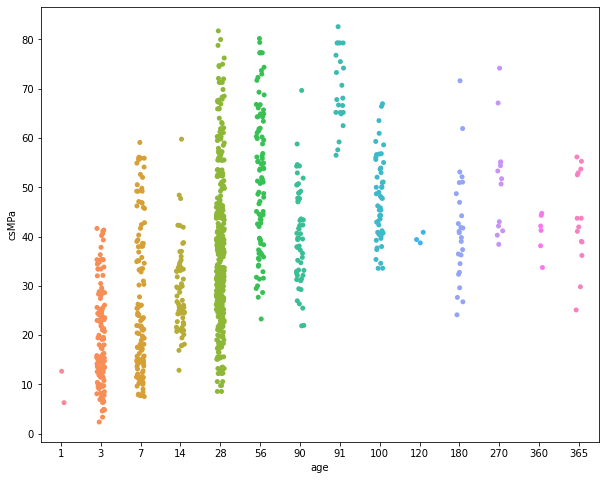

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='age', y='csMPa', data=df);

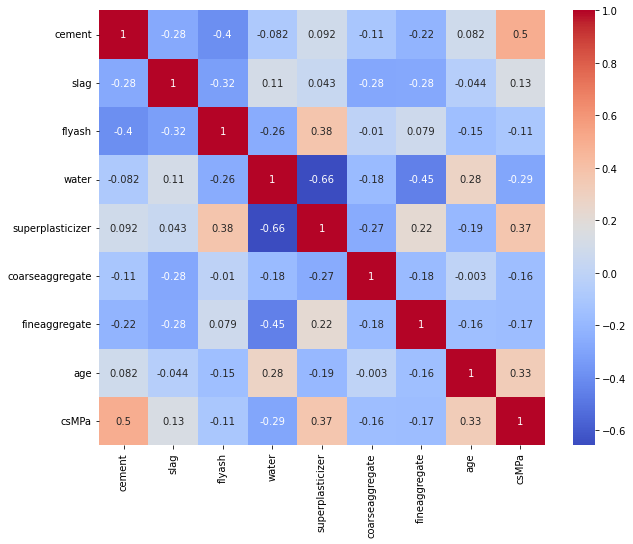

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [12]:
X = df.drop(['csMPa'], axis=1)
y = df['csMPa']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [16]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500,
                            max_samples=1.0,
                            bootstrap=False, # Pasting
                            n_jobs=-1)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print(f'Train Score: {bag_reg.score(X_train, y_train):.4f}')
print(f'Test Score: {bag_reg.score(X_test, y_test):.4f}')

Train Score: 0.9969
Test Score: 0.8382


In [19]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500,
                            max_samples=1.0,
                            bootstrap=True, # Bagging
                            n_jobs=-1,
                            oob_score=True)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print(f'Train Score: {bag_reg.score(X_train, y_train):.4f}')
print(f'Test Score: {bag_reg.score(X_test, y_test):.4f}')
print(f'OOB Score: {bag_reg.oob_score_:.4f}')

Train Score: 0.9864
Test Score: 0.8830
OOB Score: 0.9159


In [20]:
# Random Subspaces(Bootstrap features)
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500,
                            max_samples=1.0,
                            bootstrap=False,
                            bootstrap_features=True,
                            n_jobs=-1)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print(f'Train Score: {bag_reg.score(X_train, y_train):.4f}')
print(f'Test Score: {bag_reg.score(X_test, y_test):.4f}')

Train Score: 0.9502
Test Score: 0.8253


In [22]:
# Random Patches (Subset of samples and features)
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=False,
                            bootstrap_features=True,
                            max_features=0.8,
                            n_jobs=-1)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print(f'Train Score: {bag_reg.score(X_train, y_train):.4f}')
print(f'Test Score: {bag_reg.score(X_test, y_test):.4f}')

Train Score: 0.7808
Test Score: 0.7080


In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500,
                            max_leaf_nodes=12,
                            n_jobs=-1)
rfr.fit(X_train, y_train)
print(f'Train Score: {rfr.score(X_train, y_train):.4f}')
print(f'Test Score: {rfr.score(X_test, y_test):.4f}')

Train Score: 0.8144
Test Score: 0.7093


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=500,
                            max_leaf_nodes=12,
                            n_jobs=-1)
etr.fit(X_train, y_train)
print(f'Train Score: {etr.score(X_train, y_train):.4f}')
print(f'Test Score: {etr.score(X_test, y_test):.4f}')

Train Score: 0.7498
Test Score: 0.6984
